## Weather Prediction using Random Forest

### Import the data

In [1]:
import pandas as pd
temp = pd.read_csv('temp.csv')

### Getting an idea of how the data intially looks like

In [2]:
temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [3]:
temp.shape

(3192, 9)

In [4]:
temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [5]:
temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


__How many null entries do we have?__

In [7]:
temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [8]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


### Data Preparation

Let's drop the columns with 'Uncertainty' so as to clean up the data and avoid confusion in the future.

In [ ]:
def dropcol(temperature):
    temperature = temperature.copy()
    temperature = temperature.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
    return temperature

In [ ]:
def converttemp(x):
        x = (x * (9/5)) + 32
        return float(x)

In [ ]:
def converttime(df):
    df["LandAverageTemperature"] = df["LandAverageTemperature"].apply(converttemp)
    df["LandMaxTemperature"] = df["LandMaxTemperature"].apply(converttemp)
    df["LandMinTemperature"] = df["LandMinTemperature"].apply(converttemp)
    df["LandAndOceanAverageTemperature"] = df["LandAndOceanAverageTemperature"].apply(converttemp)
    df["dt"] = pd.to_datetime(df["dt"])
    df["Month"] = df["dt"].dt.month
    df["Year"] = df["dt"].dt.year
    df = df.drop("dt", axis=1)
    df = df.drop("Month", axis=1)
    #df = df[df.Year &gt;= 1850]
    df = df.set_index(["Year"])
    df = df.dropna()
    return df

In [ ]:
temp = dropcol(temp)

In [ ]:
temp=converttime(temp)

In [9]:
temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
temp.dropna()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [12]:
temp_new = temp.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)

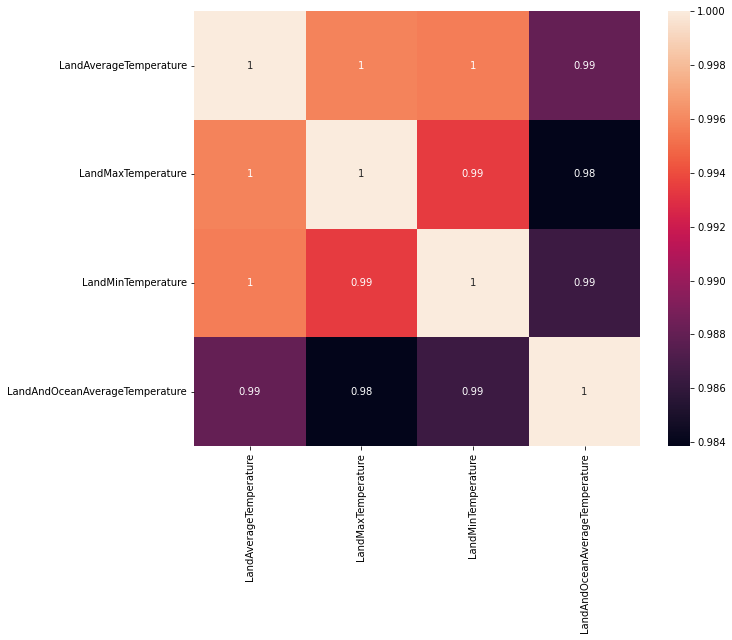

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = temp_new.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
temp_new.head()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,3.034,NaN,NaN,NaN
1,1750-02-01,3.083,NaN,NaN,NaN
2,1750-03-01,5.626,NaN,NaN,NaN
3,1750-04-01,8.490,NaN,NaN,NaN
4,1750-05-01,11.573,NaN,NaN,NaN


In [23]:
median = temp['LandAverageTemperature'].median()
temp_new['LandMaxTemperature'].fillna(median, inplace=True)

In [45]:
temp_new['LandAverageTemperature'].fillna(median, inplace=True)

In [24]:
temp_new.head()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,3.034,8.6105,NaN,NaN
1,1750-02-01,3.083,8.6105,NaN,NaN
2,1750-03-01,5.626,8.6105,NaN,NaN
3,1750-04-01,8.490,8.6105,NaN,NaN
4,1750-05-01,11.573,8.6105,NaN,NaN


In [25]:
temp_new['LandMinTemperature'].fillna(median, inplace=True)
temp_new['LandAndOceanAverageTemperature'].fillna(median, inplace=True)

In [33]:
temp_new.head()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,3.034,8.6105,8.6105,8.6105
1,1750-02-01,3.083,8.6105,8.6105,8.6105
2,1750-03-01,5.626,8.6105,8.6105,8.6105
3,1750-04-01,8.490,8.6105,8.6105,8.6105
4,1750-05-01,11.573,8.6105,8.6105,8.6105


In [34]:
temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [35]:
target = "LandAndOceanAverageTemperature"
y = temp_new[target]
#x = global_temp[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]

In [46]:
x = temp_new[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]

In [47]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=100)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(2553, 3)
(639, 3)
(2553,)
(639,)


In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
ypred = [ytrain.mean()] * len(ytrain)
print("Baseline MSE: ", round(mean_squared_error(ytrain, ypred), 5))
print("Baseline MAE: ", round(mean_absolute_error(ytrain, ypred), 5))

Baseline MSE:  11.18747
Baseline MAE:  3.07968


In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor

In [61]:
model = RandomForestRegressor(n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1)
model.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=50, n_jobs=-1, random_state=77)

In [62]:
print(ytest.shape)

(639,)


In [63]:
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dt                              3192 non-null   object 
 1   LandAverageTemperature          3192 non-null   float64
 2   LandMaxTemperature              3192 non-null   float64
 3   LandMinTemperature              3192 non-null   float64
 4   LandAndOceanAverageTemperature  3192 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.8+ KB


In [64]:
ypred = [yval.mean()] * len(yval)
errors = abs(ypred - yval)
mape = 100 * (errors/ytrain)
accuracy = 100 - np.mean(mape)
print("Random Forest Model: ", round(accuracy, 2), "%")

Random Forest Model:  nan %
